# How to Code?
The amount of programming skill you need to do useful things in Jupyter is astonishingly small.  Anyone can certainly build on these basic tools but it isn't required for much of what we do.  If you can use a modern scientific calculator there you probably aren't going to see a lot different here.  If you think about how we use spreadsheets in science this tool may be even less difficult because all the steps are laid out for reuse and easy modification. 

As with other HOWTO guides this document is meant to be interactive. Make a copy of it and try the things presented here and let it become your own reference.

## In the beginning...
The programming engine is called the '*kernel*' and by default, most of the time in jupyter is a programming language called `python`. Note that while jupyter evolved from ipython and python itself the underlying code package or *kernel* can be changed.  If you are **Ruby** fan or **R** aficionado then you can use this same framework with those languages (just not in Google's CoLab, yet)*


### Syntax
Computers are literal. What you type and how you type it can make a difference in how the system understands and responds to your efforts to do something.  Python is more flexible than some other languages but still requires some discipline. 

Code cells are meant to be mini programs or data manipulations. Generally they are run from the top of the page to the bottom.  Each cell creates consequences: they can define variables and functions that persist throughout a notebook.  Sometimes we do things out of order: we go back and redefine what "*x*" is and suddenly something that worked before now gives us an error message.  Keep this in mind when something doesn't work as expected.

#### Every code cell, once run, gets a sequence number

which means we can trace the history of everything we do.  Before you finish with a notebook and close it out it is good practice to go to the *Runttime* menu, *restart the runtime* and *run all*.  If you get no cells with angry red marks then you'll get what you expect the next time you open the notebook.

#### Code blocks are based on indentation

Indentation is a python characteristic which, depending on who you ask, is a boon or a burden (and sometimes both).  It makes for easy and fast coding but at the expense of weird bugs. Some of the details may not make sense at first if you are new to programming but skim through so you understand why putting spaces in front of your commands can affect the behavior of the calculation.

> **Blocks**

*Code Block*: a group of instructions that are meant to run together as a team.  e.g. if I want to run a sequence of instructions when $x<0$ then I would write: 
```python
if x<0:
  y = runThis(x)
  thenDoThis(y,x)
  andFinally()
else:
  x = x + 1

# this is run after the above *if* module is complete
ThisIsNotInEitherOfTheAboveCodeBlocks()
```
The three lines following the `if x<0` test are in a block set off by the fact that they share the same indentation. The `else` marks the start of a new block (see the ':'?). Finally the line that returns to the same level of indentation as the `if` and `else` statements.

> **Keywords**

In general, *keywords* are special words within a programming language that are *reserved*. You can't use them as symbol names or for any other purpose than what they are intended for. In the above example `if` and `else` are just such *keywords*.  The following list is not exhaustive but may help you get a handle on special words used with the python language so you don't trip when you accidentally try to use one:

>**`def`** starts a definition block for defining a function. e.g.
```python
def myFunction( input ):
  output = 2 * input  # output doesn't exist away from this function
  return output  # always return the result of your effort.
```

>**`if`** starts a conditional block: a block that runs only if the result of the argument is true:
```python
if a < 0.0:
  somestuffTheRunsWhen_a_is_less_than_0()
```
```python
if x is 0:  # only works reliably when you know x holds integer values
  somestuffTheRunsWhen_x_is_0()
```
>**`else`** starts an alternative conditional block: a block that runs if the preceding `if` statement is not true:
```python
if x is 0:  # only works reliably when you know x holds integer values
  somestuffTheRunsWhen_x_is_0()
else:
  doThisOtherWise()
```

#### Functions are defined in blocks


Functions, as are they in in our math classes, a convenience to define some repetative operation with a simple symbol.  When you started algebra, a symbol $x$ or $y$ stood as a proxy for a number.  As we advanced we learned that we could use symbols to define operations with symbols as well.  Python allows us to define a symbol as a sequence of operations:

```python
def myFunction( param1, param2 ):
  """
    Three double quotes sets off a comment 'block' which can 
    span multiple lines. This is where, in the code block, you 
    would describe what this function is designed to do.  In a
    Jupyter Notebook you would also preceed it with a more general
    explanation as to why you need this. A mathematical or physical
    model you are trying to recreate, etc.
    myFunction is the name of your function, 
    param1 and param2 are the names of inputs to your functions (
      you can have as many as you like)
    every instruction that follows walks through your algorithm.
    Be sure to return your result.

    One line comments start with a hashtag: #  see examples below 
  """
  localValue = param1 + param2  # add the two and store the result
  localValue = localValue * 0.25 # take 25% of the result
  return localValue  # return the result.
```
In the above, ultra-simplified example, I have a funtion that produces the following result: 

$$z = 25\% \;\left(x + y\right)$$
Notice that the variable `localValue` is a temporary placeholder that only lives while the function is running and is discarded once the function is complete and returned its calculation.


### Calculations

One thing that your scientific calculator can do but you may not take advantage of is the ability to store values in variables.  Doing so allows you to do calculations with the symbols so that they match the kind of formulae that you might be trying to implement.

The equation that gives us the roots (or zeros) to a quadratic equation:
$$y = a\;x^2 + b\;x + c \text{ when } y=0 \tag{1}$$
is given by
$$x = \frac{b \pm \sqrt{b^2-4\;a\;c}}{2 a} \tag{2}$$

Notice a couple of things in these familiar math expressions.

  1. the equal sign is intended to declare a relationship
  1. the variables don't hold any values, they are place holders
  1. we recognize that in the hierarchy of the variables we know...
    - that the relationship is between x and
    - y, the symbols a, b, and c represent arbitrary coefficients.

Python, on the other hand, sees mistakes and missing values.  Python like most proceedural languages are trying to interpret instructions.  Python wants to do a calculation using all of the above variables and, in the case of (1), determine a specific value for y.

  > **=** means read this as *set the value(s) on the left side equal to the value(s) or calculation on the right.*
  >
  > **==** means asking the question _**is** the left side equal to the right side?_

If this weren't bad enough python requires some special syntax for expressing these equations:

Eqn (1) becomes `y = a * x**2 + b * x + c`.  Notice that we have to explicitly put in multiplications and that exponentiation, $x^2$, becomes `x**2`

Eqn (2) introduces a new problem. While square root may be defined in your calculator, it isn't automatically provided in python. We have to import the function from a `math` library. In addition we don't have an operator for $\pm$ so we need to perform the caclulation for each instance:
```python
from math import sqrt # import the sqrt algorithm
x_positive = (-b + sqrt(b**2 - 4 * a * c))/(2 * a)
x_negative = (-b - sqrt(b**2 - 4 * a * c))/(2 * a)
```
A few things in this last expression that you should notice.
  - python doesn't care about spaces but they are helpful for humans to read
  - variable names can be more than one letter. In fact it is encouraged to use descriptive names so you know what is being stored
  - These calculations won't work if a, b, and c are not given some numerical value ahead of these expressions

In [ ]:
y = a * x**2 + b * x + c  # won't work if a, b, c, and x are not defined with values.

NameError: ignored

**Important note:** do not be afraid of error messages. If you read carefully, many times the program will tell you what is wrong to remind you what you have to fix.

In [ ]:
a =  - 2.34
b = 4.52
c = 5.6E-3

x = 1.2
y = a * x**2 + b * x + c  # OK now that the variables are defined.
y

2.0599999999999996

Some standard functions are not 'built-in' so we have to `import` them before we can use them.  The standard library for mathematical functions is `math` but as we will see below there is a prefered one that gives us all the same ability but with some superpowers. 

In [ ]:
from math import sqrt  
# Notice that the variables were assined numerical values above so we can use them now
x_positive = (-b + sqrt(b**2 - 4 * a *c))/(2 * a)
x_negative = (-b - sqrt(b**2 - 4 * a *c))/(2 * a)
(x_positive, x_negative)

(-0.0012381444195238103, 1.9328620760434554)

## More about libraries

We start the data processing component by simply executing the following lines somewhere near the top of our notebook in a code cell.
```python
import numpy as np
import matplotlib.pyplot as plt
```
  1. The first line brings in the `numpy` package which allows us to deal with scalars (single values) as easily as it is to deal with vectors (lists of numbers).  
  2. `matplotlib` is our graphing package which we will use to make graphs. 

Optionally we can include another library which isn't available automatically.  We need an extra step to bring it in using the `pip` command:
```python
try:  # if we have already imported the library then this works.
    import pint
    SI = pint.UnitRegistry(system="mks")  # loads the default SI units
except:  # if we haven't installed it yet, this installs and loads it
    !pip install -q --upgrade pint # handles units with our calculations
    import pint
    SI = pint.UnitRegistry(system="mks")  # loads the default SI units
```
  3. `pint` allows us to attach units to our numbers so when we perform calculations based on real-world values with mixed units conversions can be done on the fly.
 
You only need to put these lines close to the top of yur document so you remember to 'run' them once.

 > Before you read further, do youself a favor and include the following link in your _**customized code snippets**_. This doesn't make much sense now but follow the following instructions and you'll welcome the addition:

 1. Click on '*Settings*' item in the '*Tools*' menu in the above toolbar
 2. Click in the '*Customs snippet notebook URL*' and paste the following...
 > `https://colab.research.google.com/drive/1kBw3cHrYThkQOVq_LHsj7r3bxEk7FJE1`

This will make many of the things discussed in this document available as short cuts in this document.

In [ ]:
# First the usual imports:
import numpy as np
# matplotlib is the tool that will create the graphs
import matplotlib.pyplot as plt

## Basic calculations
*Python as a calulator*: Just as you would in a calculator you can type expressions to give the results of a simple calculator. Note that python doesn't understand implicit multiplication and while all the same PEMDAS rules do hold, don't depend on it; __use * to indicate multiplication__ and __use parentheses to make your intention clear__.  

One little quirk with python is that exponentiation is done with `**` rather than with a `^`.   $4^2$ is expressed as `4**2` in python. Other than that experssions can be exactly what you'd type into a TInspire$^{^{TM}}$ calculator.

In [ ]:
2.3 * 4.5

10.35

In [ ]:
3.45 * 1.5E-4 # ieee notation is used for scientific notation.  Note 1.5E-4 == 1.5e-4 == 0.00015

0.0005175

In [ ]:
(2.34 + 4) / 3.0**2  # Order of operations means the exponentiarion acts on the 3 before the division but () override the addition

0.7044444444444444

So what?, you say, my calculator can do this. Yes and your calculator can assign values to variables as well:

In [ ]:
# moreover we can plot this relationship easily
gfs = 9.81 # common physics constant in m/s^2
mass = 3.4E2 # kg 
weight = gfs * mass  # Newton
weight

3335.4

That was easy. But the real power is doing calculations transparently when the value is a single value or a set of values.

In [ ]:
t = 1.2 # s  A single time value
v0 = 1.4 # m/s
a = -1.1 # m/s^2
x = v0 * t + 1/2 * a * t**2
x

0.8879999999999999

Here is one way we can create a list of values

In [ ]:
# time is a collection of values
t = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]) # s  A set of time values
# nothing else chagnes
v0 = 1.4 # m/s
a = -1.1 # m/s^2
x = v0 * t + 1/2 * a * t**2
x
# but now x creates a set of values

array([0.   , 0.258, 0.472, 0.642, 0.768, 0.85 , 0.888])

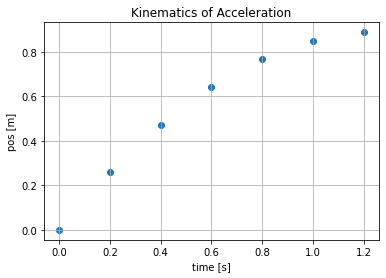

In [ ]:
# moreover we can plot this relationship easily
plt.scatter(t, x)
plt.title("Kinematics of Acceleration")
plt.xlabel("time [s]")
plt.ylabel("pos [m]")
plt.grid(True)
plt.show() # Force the presentation of the graph.

### More ways to build arrays

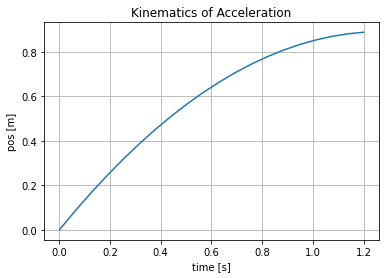

In [ ]:
t = np.linspace(0.0,1.2,20) # s  A set of 20 time values between 0.0 and 1.2
# nothing else chagnes
v0 = 1.4 # m/s
a = -1.1 # m/s^2
x = v0*t + 1/2*a*t**2

# moreover we can plot this relationship easily
plt.plot(t, x)
plt.title("Kinematics of Acceleration")
plt.xlabel("time [s]")
plt.ylabel("pos [m]")
plt.grid(True)
plt.show()

Notice that as we built these calculations up we don't need to re-type anything but can simply copy and paste the pieces we need as we develop ever more sophisticated steps.

### What we have so far...

With the three above examples we see that the process of dealing with a calculation is exactly the same from a single value to a list of 5 manualy entered value to 20 (could have been 200) automatically generated values.

Plotting is almost trivial.  When we are done we will see a summary of commands that are needed to do simple calculations.  Sometimes our data is pulled in from electronic measurements in the form of comma separated values (*CSV*) in files. 
  